# [Polars](https://www.pola.rs/) Cheat Sheet

[![Polars cheat sheet: download as PDF](https://img.shields.io/badge/Polars%20cheat%20sheet-Download%20as%20PDF-green)](https://franzdiebold.github.io/polars-cheat-sheet/Polars_cheat_sheet.pdf)

Most examples were taken from the official [Polars user guide](https://pola-rs.github.io/polars-book/user-guide/).

By Franz Diebold ([diebold.io](https://www.diebold.io)), inspired by [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

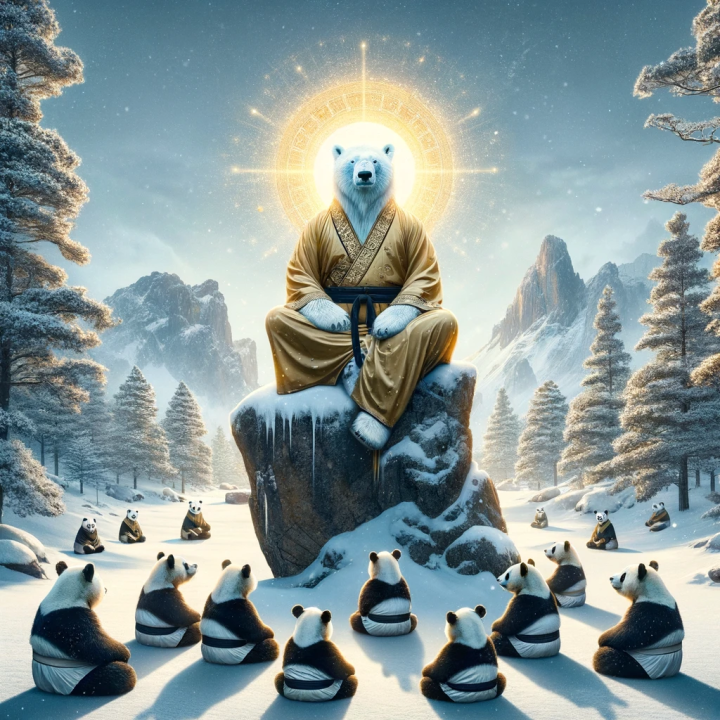

###En el mundo en constante evolución del análisis de datos, la eficiencia y la velocidad son cruciales. Aquí es donde Polars entra en escena, presentándose como una alternativa moderna y potente a la tradicional biblioteca Pandas en Python. Con un rendimiento superior en numerosos aspectos, desde la manipulación de grandes volúmenes de datos hasta operaciones complejas de procesamiento, Polars no solo desafía el estatus quo, sino que lo redefine. Este artículo se adentra en el mundo de Polars, destacando sus capacidades avanzadas y comparándolas con las de Pandas. Ya sea que estés familiarizado con Pandas o estés buscando una herramienta más robusta para tus proyectos de análisis de datos, te invito a descubrir cómo Polars puede revolucionar tu flujo de trabajo en el análisis de datos.

###Polars emerge como una solución innovadora en el procesamiento de datos, diseñada para superar las limitaciones de bibliotecas existentes como pandas. Su desarrollo se enfoca en la manipulación eficiente de grandes volúmenes de datos, destacando en el ámbito de la ciencia de datos por su agilidad y capacidad para manejar datasets complejos. Esta biblioteca representa un avance significativo en el análisis de datos, proporcionando una alternativa más eficaz y rápida para los profesionales del sector.

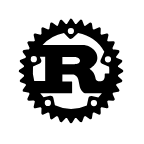

###El núcleo de Polars, meticulosamente escrito en Rust, representa una evolución significativa en el campo del procesamiento de datos. Rust, conocido por su eficiencia y rendimiento comparable al de lenguajes como C y C++, es fundamental para las capacidades superiores de Polars. Esta elección de lenguaje permite un manejo óptimo de la memoria y una ejecución de operaciones más rápida y eficiente en comparación con bibliotecas basadas en lenguajes de alto nivel como Python.

###El motor de GPU Polars con tecnología RAPIDS cuDF ya está disponible en versión beta abierta

https://www.rust-lang.org/


# **<font color="#07a8ed">Install**

In [6]:
!pip install polars -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 29.1 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0


# **<font color="#07a8ed">Aceleracion de Polars**

https://developer.nvidia.com/blog/polars-gpu-engine-powered-by-rapids-cudf-now-available-in-open-beta/

In [7]:
!pip install polars[gpu] --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [8]:
import polars as pl
print(pl.__version__)

1.9.0


# **<font color="#07a8ed">Import**

In [9]:
import polars as pl

# **<font color="#07a8ed">Estructuras de Datos**

# **<font color="#07a8ed">Polars posee dos estructuras de datos, Series y DataFrame**

# **<font color="#07a8ed">Series**

###Una Serie en Polars es una estructura de datos unidimensional que puede contener cualquier tipo de datos (enteros, cadenas, booleanos, etc.), similar a una columna en una hoja de cálculo o una base de datos. Cada elemento en una Serie tiene un índice asociado, que permite un acceso rápido a los datos.

In [10]:
# Creando una Serie simple
serie_numeros = pl.Series("numeros", [1, 2, 3, 4, 5])
print(serie_numeros)


shape: (5,)
Series: 'numeros' [i64]
[
	1
	2
	3
	4
	5
]


# **<font color="#07a8ed">DataFrame**

##Un DataFrame en Polars es una estructura de datos bidimensional, similar a una tabla en SQL o una hoja de cálculo, donde cada columna es una Serie de Polars. Los DataFrames son ideales para representar datos en forma tabular y realizar operaciones complejas de manipulación de datos.

In [11]:
# Creando un DataFrame
df = pl.DataFrame(
    {
        "nrs": [1, 2, 3, None, 5],
        "names": ["foo", "ham", "spam", "egg", None],
        "random": [0.3, 0.7, 0.1, 0.9, 0.6],
        "groups": ["A", "A", "B", "C", "B"],
    }
)

In [12]:
df

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""


In [13]:
print(df)

shape: (5, 4)
┌──────┬───────┬────────┬────────┐
│ nrs  ┆ names ┆ random ┆ groups │
│ ---  ┆ ---   ┆ ---    ┆ ---    │
│ i64  ┆ str   ┆ f64    ┆ str    │
╞══════╪═══════╪════════╪════════╡
│ 1    ┆ foo   ┆ 0.3    ┆ A      │
│ 2    ┆ ham   ┆ 0.7    ┆ A      │
│ 3    ┆ spam  ┆ 0.1    ┆ B      │
│ null ┆ egg   ┆ 0.9    ┆ C      │
│ 5    ┆ null  ┆ 0.6    ┆ B      │
└──────┴───────┴────────┴────────┘


In [14]:
# Leer CSV
df1 = pl.read_csv("https://j.mp/iriscsv", has_header=True)

In [15]:
df1

sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""
4.6,3.1,1.5,0.2,"""setosa"""
5.0,3.6,1.4,0.2,"""setosa"""
…,…,…,…,…
6.7,3.0,5.2,2.3,"""virginica"""
6.3,2.5,5.0,1.9,"""virginica"""
6.5,3.0,5.2,2.0,"""virginica"""


In [16]:
print(df1)

shape: (150, 5)
┌──────────────┬─────────────┬──────────────┬─────────────┬───────────┐
│ sepal_length ┆ sepal_width ┆ petal_length ┆ petal_width ┆ species   │
│ ---          ┆ ---         ┆ ---          ┆ ---         ┆ ---       │
│ f64          ┆ f64         ┆ f64          ┆ f64         ┆ str       │
╞══════════════╪═════════════╪══════════════╪═════════════╪═══════════╡
│ 5.1          ┆ 3.5         ┆ 1.4          ┆ 0.2         ┆ setosa    │
│ 4.9          ┆ 3.0         ┆ 1.4          ┆ 0.2         ┆ setosa    │
│ 4.7          ┆ 3.2         ┆ 1.3          ┆ 0.2         ┆ setosa    │
│ 4.6          ┆ 3.1         ┆ 1.5          ┆ 0.2         ┆ setosa    │
│ 5.0          ┆ 3.6         ┆ 1.4          ┆ 0.2         ┆ setosa    │
│ …            ┆ …           ┆ …            ┆ …           ┆ …         │
│ 6.7          ┆ 3.0         ┆ 5.2          ┆ 2.3         ┆ virginica │
│ 6.3          ┆ 2.5         ┆ 5.0          ┆ 1.9         ┆ virginica │
│ 6.5          ┆ 3.0         ┆ 5.2          ┆ 2.

In [17]:
df2 = pl.read_parquet("https://raw.githubusercontent.com/Viny2030/datasets/main/avocado.parquet")
df2

column00,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,str
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,"""conventional""",2015,"""Albany"""
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,"""conventional""",2015,"""Albany"""
2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,"""conventional""",2015,"""Albany"""
3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,"""conventional""",2015,"""Albany"""
4,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,"""conventional""",2015,"""Albany"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
7,2018-02-04,1.63,17074.83,2046.96,1529.2,0.0,13498.67,13066.82,431.85,0.0,"""organic""",2018,"""WestTexNewMexico"""
8,2018-01-28,1.71,13888.04,1191.7,3431.5,0.0,9264.84,8940.04,324.8,0.0,"""organic""",2018,"""WestTexNewMexico"""
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.8,42.31,0.0,"""organic""",2018,"""WestTexNewMexico"""


###Parquet es un formato de archivo de código abierto creado para manejar formatos de datos de almacenamiento en columnas planas . Parquet funciona bien con datos complejos en grandes volúmenes. Es conocido tanto por su compresión de datos de alto rendimiento como por su capacidad para manejar una amplia variedad de tipos de codificación.

In [19]:
df2.columns #### nombre de columnas

['column00',
 'Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'type',
 'year',
 'region']

In [20]:
 ## tipos de datos de las columnas
df2.dtypes

[Int64,
 Date,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 Float64,
 String,
 Int64,
 String]

In [21]:
## # Forma de DataFrame: número de filas y columnas
df2.shape

(18249, 14)

In [22]:
## numeros de filas
df2.height

18249

In [23]:
## numero de columnas
df2.width

14

In [24]:
### # Visualizar estadísticas sobre las columnas: contar, media, std, min, max, etc.
df2.describe()

statistic,column00,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str
"""count""",18249.0,"""18249""",18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,18249.0,"""18249""",18249.0,"""18249"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,"""0"""
"""mean""",24.232232,"""2016-08-13 23:30:43.498000""",1.405978,850644.013009,293008.424531,295154.568356,22839.735993,239639.20206,182194.686696,54338.088145,3106.426507,null,2016.147899,null
"""std""",15.481045,null,0.402677,3.4535e6,1.2650e6,1.2041e6,107464.068435,986242.399216,746178.514962,243965.964547,17692.894652,null,0.939938,null
"""min""",0.0,"""2015-01-04""",0.44,84.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""conventional""",2015.0,"""Albany"""
"""25%""",10.0,"""2015-10-25""",1.1,10838.58,854.07,3008.78,0.0,5088.64,2849.42,127.47,0.0,null,2015.0,null
"""50%""",24.0,"""2016-08-14""",1.37,107376.76,8645.3,29061.02,184.99,39743.83,26362.82,2647.71,0.0,null,2016.0,null
"""75%""",38.0,"""2017-06-04""",1.66,432962.29,111020.2,150206.86,6243.42,110783.37,83337.67,22029.25,132.5,null,2017.0,null
"""max""",52.0,"""2018-03-25""",3.25,6.2506e7,2.2744e7,2.0471e7,2.5464e6,1.9373e7,1.3385e7,5.7191e6,551693.65,"""organic""",2018.0,"""WestTexNewMexico"""


In [25]:
### Estime el uso de memoria del DataFrame
df2.estimated_size("mb")

1.9456491470336914

In [26]:
## # Ordene el marco de datos por la columna "date" en orden descendente
df2.sort("Date", descending=True)

column00,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,str
0,2018-03-25,1.57,149396.5,16361.69,109045.03,65.45,23924.33,19273.8,4270.53,380.0,"""conventional""",2018,"""Albany"""
0,2018-03-25,1.04,624645.42,281209.4,33187.58,1831.33,308417.11,227944.75,77406.46,3065.9,"""conventional""",2018,"""Atlanta"""
0,2018-03-25,1.23,986038.75,108250.52,591934.75,4205.03,281648.45,277508.08,2777.04,1363.33,"""conventional""",2018,"""BaltimoreWashington"""
0,2018-03-25,1.28,85839.98,40361.51,2026.94,9200.23,34251.3,24809.18,9434.29,7.83,"""conventional""",2018,"""Boise"""
0,2018-03-25,1.39,641462.43,26019.52,479186.12,1883.17,134373.62,109938.39,22955.23,1480.0,"""conventional""",2018,"""Boston"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
51,2015-01-04,1.72,593.39,0.0,102.71,0.0,490.68,490.68,0.0,0.0,"""organic""",2015,"""Syracuse"""
51,2015-01-04,1.7,1885.48,748.62,30.19,0.0,1106.67,1106.67,0.0,0.0,"""organic""",2015,"""Tampa"""
51,2015-01-04,1.46,612910.15,233286.13,216611.2,4370.99,158641.83,115068.71,43573.12,0.0,"""organic""",2015,"""TotalUS"""


In [18]:
df2.schema  #### Esquema de la tabla: nombres y tipos de columnas

Schema([('column00', Int64),
        ('Date', Date),
        ('AveragePrice', Float64),
        ('Total Volume', Float64),
        ('4046', Float64),
        ('4225', Float64),
        ('4770', Float64),
        ('Total Bags', Float64),
        ('Small Bags', Float64),
        ('Large Bags', Float64),
        ('XLarge Bags', Float64),
        ('type', String),
        ('year', Int64),
        ('region', String)])

In [27]:
for i in df2.columns:
    print(f"Column: {i}") ### automatizacion de la Cuenta el número de elementos nulos en un eje especificado
    print(df2[i].null_count())

Column: column00
0
Column: Date
0
Column: AveragePrice
0
Column: Total Volume
0
Column: 4046
0
Column: 4225
0
Column: 4770
0
Column: Total Bags
0
Column: Small Bags
0
Column: Large Bags
0
Column: XLarge Bags
0
Column: type
0
Column: year
0
Column: region
0


In [28]:
for i in df2.columns:
  print(f"Column: {i}")
  print(df2[i].unique())

Column: column00
shape: (53,)
Series: 'column00' [i64]
[
	0
	1
	2
	3
	4
	…
	48
	49
	50
	51
	52
]
Column: Date
shape: (169,)
Series: 'Date' [date]
[
	2015-01-04
	2015-01-11
	2015-01-18
	2015-01-25
	2015-02-01
	…
	2018-02-25
	2018-03-04
	2018-03-11
	2018-03-18
	2018-03-25
]
Column: AveragePrice
shape: (259,)
Series: 'AveragePrice' [f64]
[
	0.44
	0.46
	0.48
	0.49
	0.51
	…
	3.04
	3.05
	3.12
	3.17
	3.25
]
Column: Total Volume
shape: (18_237,)
Series: 'Total Volume' [f64]
[
	84.56
	379.82
	385.55
	419.98
	472.82
	…
	4.6325e7
	4.7294e7
	5.2289e7
	6.1034e7
	6.2506e7
]
Column: 4046
shape: (17_702,)
Series: '4046' [f64]
[
	0.0
	1.0
	1.13
	1.19
	1.2
	…
	1.7077e7
	1.7788e7
	1.8933e7
	2.1620e7
	2.2744e7
]
Column: 4225
shape: (18_103,)
Series: '4225' [f64]
[
	0.0
	1.26
	1.28
	1.3
	1.31
	…
	1.7896e7
	1.8956e7
	2.0328e7
	2.0446e7
	2.0471e7
]
Column: 4770
shape: (12_071,)
Series: '4770' [f64]
[
	0.0
	0.83
	1.0
	1.01
	1.09
	…
	1.8111e6
	1.8802e6
	1896149.5
	1.9936e6
	2.5464e6
]
Column: Total Bags
shape:

In [30]:
for i in df2.columns:
    print(f"Column: {i}")  ### automatizacion de valores unicos de todas las variables
    print(df2[i].unique())

Column: column00
shape: (53,)
Series: 'column00' [i64]
[
	0
	1
	2
	3
	4
	…
	48
	49
	50
	51
	52
]
Column: Date
shape: (169,)
Series: 'Date' [date]
[
	2015-01-04
	2015-01-11
	2015-01-18
	2015-01-25
	2015-02-01
	…
	2018-02-25
	2018-03-04
	2018-03-11
	2018-03-18
	2018-03-25
]
Column: AveragePrice
shape: (259,)
Series: 'AveragePrice' [f64]
[
	0.44
	0.46
	0.48
	0.49
	0.51
	…
	3.04
	3.05
	3.12
	3.17
	3.25
]
Column: Total Volume
shape: (18_237,)
Series: 'Total Volume' [f64]
[
	84.56
	379.82
	385.55
	419.98
	472.82
	…
	4.6325e7
	4.7294e7
	5.2289e7
	6.1034e7
	6.2506e7
]
Column: 4046
shape: (17_702,)
Series: '4046' [f64]
[
	0.0
	1.0
	1.13
	1.19
	1.2
	…
	1.7077e7
	1.7788e7
	1.8933e7
	2.1620e7
	2.2744e7
]
Column: 4225
shape: (18_103,)
Series: '4225' [f64]
[
	0.0
	1.26
	1.28
	1.3
	1.31
	…
	1.7896e7
	1.8956e7
	2.0328e7
	2.0446e7
	2.0471e7
]
Column: 4770
shape: (12_071,)
Series: '4770' [f64]
[
	0.0
	0.83
	1.0
	1.01
	1.09
	…
	1.8111e6
	1.8802e6
	1896149.5
	1.9936e6
	2.5464e6
]
Column: Total Bags
shape:

In [31]:
for i in df2.columns:
    print(f"Column: {i}")  ### automatizacion del porcentaje del  número de elementos nulos en un eje especificado
    print(df2[i].null_count()/df2.shape[0])

Column: column00
0.0
Column: Date
0.0
Column: AveragePrice
0.0
Column: Total Volume
0.0
Column: 4046
0.0
Column: 4225
0.0
Column: 4770
0.0
Column: Total Bags
0.0
Column: Small Bags
0.0
Column: Large Bags
0.0
Column: XLarge Bags
0.0
Column: type
0.0
Column: year
0.0
Column: region
0.0


In [34]:
for i in df2.columns:
  print(f"Column: {i}")
  print(df2[i].is_null().sum())

Column: column00
0
Column: Date
0
Column: AveragePrice
0
Column: Total Volume
0
Column: 4046
0
Column: 4225
0
Column: 4770
0
Column: Total Bags
0
Column: Small Bags
0
Column: Large Bags
0
Column: XLarge Bags
0
Column: type
0
Column: year
0
Column: region
0


In [35]:
for i in df2.columns:
  print(f"Column: {i}")
  print(df2[i].null_count())

Column: column00
0
Column: Date
0
Column: AveragePrice
0
Column: Total Volume
0
Column: 4046
0
Column: 4225
0
Column: 4770
0
Column: Total Bags
0
Column: Small Bags
0
Column: Large Bags
0
Column: XLarge Bags
0
Column: type
0
Column: year
0
Column: region
0


In [36]:
for i in df2.columns:
  print(f"Column: {i}")
  print(df2[i].unique())

Column: column00
shape: (53,)
Series: 'column00' [i64]
[
	0
	1
	2
	3
	4
	…
	48
	49
	50
	51
	52
]
Column: Date
shape: (169,)
Series: 'Date' [date]
[
	2015-01-04
	2015-01-11
	2015-01-18
	2015-01-25
	2015-02-01
	…
	2018-02-25
	2018-03-04
	2018-03-11
	2018-03-18
	2018-03-25
]
Column: AveragePrice
shape: (259,)
Series: 'AveragePrice' [f64]
[
	0.44
	0.46
	0.48
	0.49
	0.51
	…
	3.04
	3.05
	3.12
	3.17
	3.25
]
Column: Total Volume
shape: (18_237,)
Series: 'Total Volume' [f64]
[
	84.56
	379.82
	385.55
	419.98
	472.82
	…
	4.6325e7
	4.7294e7
	5.2289e7
	6.1034e7
	6.2506e7
]
Column: 4046
shape: (17_702,)
Series: '4046' [f64]
[
	0.0
	1.0
	1.13
	1.19
	1.2
	…
	1.7077e7
	1.7788e7
	1.8933e7
	2.1620e7
	2.2744e7
]
Column: 4225
shape: (18_103,)
Series: '4225' [f64]
[
	0.0
	1.26
	1.28
	1.3
	1.31
	…
	1.7896e7
	1.8956e7
	2.0328e7
	2.0446e7
	2.0471e7
]
Column: 4770
shape: (12_071,)
Series: '4770' [f64]
[
	0.0
	0.83
	1.0
	1.01
	1.09
	…
	1.8111e6
	1.8802e6
	1896149.5
	1.9936e6
	2.5464e6
]
Column: Total Bags
shape:

In [37]:
for i in df2.columns:
    print(f"Column: {i}")
    print(df2[i].describe())
    print()  # Agregue una nueva línea para una mejor legibilidad

Column: column00
shape: (9, 2)
┌────────────┬───────────┐
│ statistic  ┆ value     │
│ ---        ┆ ---       │
│ str        ┆ f64       │
╞════════════╪═══════════╡
│ count      ┆ 18249.0   │
│ null_count ┆ 0.0       │
│ mean       ┆ 24.232232 │
│ std        ┆ 15.481045 │
│ min        ┆ 0.0       │
│ 25%        ┆ 10.0      │
│ 50%        ┆ 24.0      │
│ 75%        ┆ 38.0      │
│ max        ┆ 52.0      │
└────────────┴───────────┘

Column: Date
shape: (8, 2)
┌────────────┬────────────────────────────┐
│ statistic  ┆ value                      │
│ ---        ┆ ---                        │
│ str        ┆ str                        │
╞════════════╪════════════════════════════╡
│ count      ┆ 18249                      │
│ null_count ┆ 0                          │
│ mean       ┆ 2016-08-13 23:30:43.498000 │
│ min        ┆ 2015-01-04                 │
│ 25%        ┆ 2015-10-25                 │
│ 50%        ┆ 2016-08-14                 │
│ 75%        ┆ 2017-06-04                 │
│ max   

In [38]:
for i in df2.columns:
  print(f"Column: {i}")
  print(df2[i].value_counts())

Column: column00
shape: (53, 2)
┌──────────┬───────┐
│ column00 ┆ count │
│ ---      ┆ ---   │
│ i64      ┆ u32   │
╞══════════╪═══════╡
│ 52       ┆ 107   │
│ 27       ┆ 324   │
│ 49       ┆ 324   │
│ 36       ┆ 324   │
│ 28       ┆ 324   │
│ …        ┆ …     │
│ 10       ┆ 432   │
│ 18       ┆ 324   │
│ 13       ┆ 324   │
│ 43       ┆ 324   │
│ 38       ┆ 324   │
└──────────┴───────┘
Column: Date
shape: (169, 2)
┌────────────┬───────┐
│ Date       ┆ count │
│ ---        ┆ ---   │
│ date       ┆ u32   │
╞════════════╪═══════╡
│ 2015-12-13 ┆ 108   │
│ 2015-08-30 ┆ 108   │
│ 2017-12-03 ┆ 108   │
│ 2016-06-19 ┆ 108   │
│ 2018-03-04 ┆ 108   │
│ …          ┆ …     │
│ 2017-01-22 ┆ 108   │
│ 2017-07-02 ┆ 108   │
│ 2015-01-04 ┆ 108   │
│ 2016-10-09 ┆ 108   │
│ 2016-07-03 ┆ 108   │
└────────────┴───────┘
Column: AveragePrice
shape: (259, 2)
┌──────────────┬───────┐
│ AveragePrice ┆ count │
│ ---          ┆ ---   │
│ f64          ┆ u32   │
╞══════════════╪═══════╡
│ 2.05         ┆ 38    │
│ 1.

In [39]:
print(df2)

shape: (18_249, 14)
┌──────────┬─────────────┬─────────────┬─────────────┬───┬────────┬────────────┬──────┬────────────┐
│ column00 ┆ Date        ┆ AveragePric ┆ Total       ┆ … ┆ XLarge ┆ type       ┆ year ┆ region     │
│ ---      ┆ ---         ┆ e           ┆ Volume      ┆   ┆ Bags   ┆ ---        ┆ ---  ┆ ---        │
│ i64      ┆ date        ┆ ---         ┆ ---         ┆   ┆ ---    ┆ str        ┆ i64  ┆ str        │
│          ┆             ┆ f64         ┆ f64         ┆   ┆ f64    ┆            ┆      ┆            │
╞══════════╪═════════════╪═════════════╪═════════════╪═══╪════════╪════════════╪══════╪════════════╡
│ 0        ┆ 2015-12-27  ┆ 1.33        ┆ 64236.62    ┆ … ┆ 0.0    ┆ convention ┆ 2015 ┆ Albany     │
│          ┆             ┆             ┆             ┆   ┆        ┆ al         ┆      ┆            │
│ 1        ┆ 2015-12-20  ┆ 1.35        ┆ 54876.98    ┆ … ┆ 0.0    ┆ convention ┆ 2015 ┆ Albany     │
│          ┆             ┆             ┆             ┆   ┆        ┆ al 

In [41]:
### Ordene el marco de datos por titulo y review_date en orden descendente
df2.sort(["Date", "AveragePrice"], descending=[True, True])

column00,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,str
0,2018-03-25,2.09,20242.65,144.4,10949.63,0.0,9148.62,9137.73,10.89,0.0,"""organic""",2018,"""HartfordSpringfield"""
0,2018-03-25,2.02,13379.77,86.84,5923.16,98.37,7271.4,6881.8,389.6,0.0,"""organic""",2018,"""RaleighGreensboro"""
0,2018-03-25,1.86,118503.55,12695.3,35094.5,205.59,70508.16,70377.52,130.64,0.0,"""organic""",2018,"""NewYork"""
0,2018-03-25,1.82,8210.37,1426.49,2452.5,0.0,4331.38,3427.78,903.6,0.0,"""organic""",2018,"""StLouis"""
0,2018-03-25,1.81,3119.2,76.12,1006.43,0.0,2036.65,618.64,1418.01,0.0,"""organic""",2018,"""Boise"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
51,2015-01-04,0.77,5.1443e6,2745009.1,1.7551e6,73432.89,570682.81,442217.85,128451.37,13.59,"""conventional""",2015,"""SouthCentral"""
51,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.0,"""conventional""",2015,"""WestTexNewMexico"""
51,2015-01-04,0.74,1.0864e6,612795.8,374420.68,9817.28,89330.21,54563.33,34760.08,6.8,"""conventional""",2015,"""DallasFtWorth"""


In [42]:
### Agregue un número de fila a DataFrame
df2.with_row_index()

index,column00,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
u32,i64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,str
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,"""conventional""",2015,"""Albany"""
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,"""conventional""",2015,"""Albany"""
2,2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,"""conventional""",2015,"""Albany"""
3,3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,"""conventional""",2015,"""Albany"""
4,4,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,"""conventional""",2015,"""Albany"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.2,0.0,13498.67,13066.82,431.85,0.0,"""organic""",2018,"""WestTexNewMexico"""
18245,8,2018-01-28,1.71,13888.04,1191.7,3431.5,0.0,9264.84,8940.04,324.8,0.0,"""organic""",2018,"""WestTexNewMexico"""
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.8,42.31,0.0,"""organic""",2018,"""WestTexNewMexico"""


In [44]:
# Agregue un número de fila a DataFrame, en orden reverso
df2.with_row_index().reverse()

index,column00,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
u32,i64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,str
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,"""organic""",2018,"""WestTexNewMexico"""
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.0,0.0,"""organic""",2018,"""WestTexNewMexico"""
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.8,42.31,0.0,"""organic""",2018,"""WestTexNewMexico"""
18245,8,2018-01-28,1.71,13888.04,1191.7,3431.5,0.0,9264.84,8940.04,324.8,0.0,"""organic""",2018,"""WestTexNewMexico"""
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.2,0.0,13498.67,13066.82,431.85,0.0,"""organic""",2018,"""WestTexNewMexico"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
4,4,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,"""conventional""",2015,"""Albany"""
3,3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,"""conventional""",2015,"""Albany"""
2,2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,"""conventional""",2015,"""Albany"""


In [45]:
## # Agregar sufijo o prefijo
df2.select(
    pl.col("AveragePrice").name.prefix("Promedio_"),
    pl.col("Small Bags").name.suffix("A_"),
    pl.col("year"),
).head(2)

Promedio_AveragePrice,Small BagsA_,year
f64,f64,i64
1.33,8603.62,2015
1.35,9408.07,2015


In [46]:
df2.select(
    # Usando columnas existentes con pl.col()
    Promedio_AveragePrice=pl.col("AveragePrice"),
    Small_BagsA_=pl.col("Small Bags"),
    year=pl.col("year"),
).head(2)

Promedio_AveragePrice,Small_BagsA_,year
f64,f64,i64
1.33,8603.62,2015
1.35,9408.07,2015


In [47]:
## Seleccione columnas con pl.col () y cambie el nombre de alias
# El alias siempre debe estar al final de la expresión
df2.select(
    pl.col("Date").alias("Datetime"),
    pl.col("AveragePrice").alias("Promedio_de_precio"),
    pl.col("year").alias("año"),
).head(2)

Datetime,Promedio_de_precio,año
date,f64,i64
2015-12-27,1.33,2015
2015-12-20,1.35,2015


In [48]:

### Seleccionar columnas basadas en su tipo de datos: seleccione todas las columnas de cadena
df2.select(pl.col(pl.Utf8))

type,region
str,str
"""conventional""","""Albany"""
"""conventional""","""Albany"""
"""conventional""","""Albany"""
"""conventional""","""Albany"""
"""conventional""","""Albany"""
…,…
"""organic""","""WestTexNewMexico"""
"""organic""","""WestTexNewMexico"""
"""organic""","""WestTexNewMexico"""


In [49]:
# pl.all () se puede usar para seleccionar todas las columnas
df2.select(pl.all())

column00,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,str
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,"""conventional""",2015,"""Albany"""
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,"""conventional""",2015,"""Albany"""
2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,"""conventional""",2015,"""Albany"""
3,2015-12-06,1.08,78992.15,1132.0,71976.41,72.58,5811.16,5677.4,133.76,0.0,"""conventional""",2015,"""Albany"""
4,2015-11-29,1.28,51039.6,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,"""conventional""",2015,"""Albany"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
7,2018-02-04,1.63,17074.83,2046.96,1529.2,0.0,13498.67,13066.82,431.85,0.0,"""organic""",2018,"""WestTexNewMexico"""
8,2018-01-28,1.71,13888.04,1191.7,3431.5,0.0,9264.84,8940.04,324.8,0.0,"""organic""",2018,"""WestTexNewMexico"""
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.8,42.31,0.0,"""organic""",2018,"""WestTexNewMexico"""


In [50]:
### Seleccionar columnas basadas en regex: todos los nombres de columnas que contienen 'revisión'
df2.select(pl.col("^.*review.*$")).head(2)

shape: (0, 0)
┌┐
╞╡
└┘

In [51]:
# Exclude can be used with regex, or with column names, or with data types
df2.select(pl.all().exclude("^.*review.*$")).head(2)

column00,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,str
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,"""conventional""",2015,"""Albany"""
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,"""conventional""",2015,"""Albany"""


In [53]:
import polars as cs

In [58]:
# retorna columnas numericas
df2.select(cs.col(pl.Int64)).head(2)

column00,year
i64,i64
0,2015
1,2015


In [62]:
df2.select(cs.col("^.*date.*$")).head(2) ## retorna columnas con  "date"

shape: (0, 0)
┌┐
╞╡
└┘

# **<font color="#07a8ed">Expresiones**
##Las expresiones en Polars se construyen en secuencia

In [63]:
df.head(3)

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""


In [64]:
df1.head(3)

sepal_length,sepal_width,petal_length,petal_width,species
f64,f64,f64,f64,str
5.1,3.5,1.4,0.2,"""setosa"""
4.9,3.0,1.4,0.2,"""setosa"""
4.7,3.2,1.3,0.2,"""setosa"""


In [65]:
df2.head(3)

column00,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
i64,date,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,i64,str
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,"""conventional""",2015,"""Albany"""
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,"""conventional""",2015,"""Albany"""
2,2015-12-13,0.93,118220.22,794.7,109149.67,130.5,8145.35,8042.21,103.14,0.0,"""conventional""",2015,"""Albany"""


In [66]:
df

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""


In [68]:
df.filter(pl.col("nrs") < 4).group_by("groups").agg(pl.all().sum()) ## filtrado

groups,nrs,names,random
str,i64,str,f64
"""B""",3,null,0.1
"""A""",3,null,1.0


# **<font color="#07a8ed">Subset-Observaciones en filas**

In [69]:
df

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""


In [70]:
# Filtro: extraiga filas que cumplan con los criterios lógicos.
df.filter(pl.col("random") > 0.5)
df.filter((pl.col("groups") == "B") & (pl.col("random") > 0.5))

nrs,names,random,groups
i64,str,f64,str
5,null,0.6,"""B"""


In [75]:
# Muestra
# Seleccione aleatoriamente la fracción de filas.
df.sample(fraction=0.5)


nrs,names,random,groups
i64,str,f64,str
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""


In [76]:
# Seleccione al azar n filas.
df.sample(n=2)

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
3,"""spam""",0.1,"""B"""


In [73]:
# Selecciono las primeras n filas
df.head(n=2)



nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""


In [74]:

# Selecciono las ultimas n filas.
df.tail(n=2)

nrs,names,random,groups
i64,str,f64,str
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""



# **<font color="#07a8ed">Subset-Variables-columnas**

In [77]:
# Seleccione columnas con nombres especificos
df.select(["nrs", "names"])

nrs,names
i64,str
1,"""foo"""
2,"""ham"""
3,"""spam"""
null,"""egg"""
5,null


In [78]:
# Seleccione columnas cuyo nombre coincida con la expresión regular regex.
df.select(pl.col("^n.*$"))

nrs,names
i64,str
1,"""foo"""
2,"""ham"""
3,"""spam"""
null,"""egg"""
5,null


# **<font color="#07a8ed">Subset- filas y columnas**

In [79]:
# Seleccione filas 2-4.
df[2:4, :]

nrs,names,random,groups
i64,str,f64,str
3,"""spam""",0.1,"""B"""
null,"""egg""",0.9,"""C"""


In [80]:
# Seleccionar columnas en las posiciones 1 y 3 (la primera columna es 0).
df[:, [1, 3]]

names,groups
str,str
"""foo""","""A"""
"""ham""","""A"""
"""spam""","""B"""
"""egg""","""C"""
null,"""B"""


In [82]:
filtered_df = df.filter(df["random"] > 0.5)  # Filtro filas
filtered_df = filtered_df[["names", "groups"]]  # filtro nombres de columns
filtered_df

names,groups
str,str
"""ham""","""A"""
"""egg""","""C"""
null,"""B"""


# **<font color="#07a8ed">Reshaping Data-cambios, indexacion y renombre**

In [83]:
df2 = pl.DataFrame(
    {
        "nrs": [6],
        "names": ["wow"],
        "random": [0.9],
        "groups": ["B"],
    }
)

df3 = pl.DataFrame(
    {
        "primes": [2, 3, 5, 7, 11],
    }
)

In [84]:
## Concateno df y df2.
pl.concat([df, df2])

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""
6,"""wow""",0.9,"""B"""


In [85]:
# Agregar columnas de DataFrames
pl.concat([df, df3], how="horizontal")

nrs,names,random,groups,primes
i64,str,f64,str,i64
1,"""foo""",0.3,"""A""",2
2,"""ham""",0.7,"""A""",3
3,"""spam""",0.1,"""B""",5
null,"""egg""",0.9,"""C""",7
5,null,0.6,"""B""",11


In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
# Recopilar columnas en filas
df.melt(id_vars="nrs", value_vars=["names", "groups"])

nrs,variable,value
i64,str,str
1,"""names""","""foo"""
2,"""names""","""ham"""
3,"""names""","""spam"""
null,"""names""","""egg"""
5,"""names""",null
1,"""groups""","""A"""
2,"""groups""","""A"""
3,"""groups""","""B"""
null,"""groups""","""C"""


In [90]:
# Extienda las filas en columnas
df.pivot(values="nrs", index="groups", columns="names")

groups,foo,ham,spam,egg,null
str,i64,i64,i64,i64,i64
"""A""",1,2,null,null,null
"""B""",null,null,3,null,5
"""C""",null,null,null,null,null


In [91]:
# Ordenar filas por valores de una columna (bajo a alto)
df.sort("random")

nrs,names,random,groups
i64,str,f64,str
3,"""spam""",0.1,"""B"""
1,"""foo""",0.3,"""A"""
5,null,0.6,"""B"""
2,"""ham""",0.7,"""A"""
null,"""egg""",0.9,"""C"""


In [92]:
# Ordenar filas por valores de una columna (alto a bajo)
df.sort("random", descending=False)

nrs,names,random,groups
i64,str,f64,str
3,"""spam""",0.1,"""B"""
1,"""foo""",0.3,"""A"""
5,null,0.6,"""B"""
2,"""ham""",0.7,"""A"""
null,"""egg""",0.9,"""C"""


In [93]:
## Renombrar las columnas de un DataFrame
df.rename({"nrs": "idx"})

idx,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""


In [94]:
# Borrar columnas de un DataFrame
df.drop(["names", "random"])

nrs,groups
i64,str
1,"""A"""
2,"""A"""
3,"""B"""
null,"""C"""
5,"""B"""


# **<font color="#07a8ed">Sumarizar Datos**

In [95]:
# Cuenta el número de filas con cada valor único de variable
df["groups"].value_counts()

groups,count
str,u32
"""A""",2
"""B""",2
"""C""",1


In [77]:
# # of rows in DataFrame
len(df)
# or
df.height

5

In [78]:
# Tuple of # of rows, # of columns in DataFrame
df.shape

(5, 4)

In [79]:
# # of distinct values in a column
df["groups"].n_unique()

3

In [80]:
# Basic descriptive and statistics for each column
df.describe()

statistic,nrs,names,random,groups
str,f64,str,f64,str
"""count""",4.0,"""4""",5.0,"""5"""
"""null_count""",1.0,"""1""",0.0,"""0"""
"""mean""",2.75,null,0.52,null
"""std""",1.707825,null,0.319374,null
"""min""",1.0,"""egg""",0.1,"""A"""
"""25%""",2.0,null,0.3,null
"""50%""",3.0,null,0.6,null
"""75%""",3.0,null,0.7,null
"""max""",5.0,"""spam""",0.9,"""C"""


In [81]:
# Aggregation functions
df.select(
    [
        # Sum values
        pl.sum("random").alias("sum"),
        # Minimum value
        pl.min("random").alias("min"),
        # Maximum value
        pl.max("random").alias("max"),
        # or
        pl.col("random").max().alias("other_max"),
        # Standard deviation
        pl.std("random").alias("std_dev"),
        # Variance
        pl.var("random").alias("variance"),
        # Median
        pl.median("random").alias("median"),
        # Mean
        pl.mean("random").alias("mean"),
        # Quantile
        pl.quantile("random", 0.75).alias("quantile_0.75"),
        # or
        pl.col("random").quantile(0.75).alias("other_quantile_0.75"),
        # First value
        pl.first("random").alias("first"),
    ]
)

sum,min,max,other_max,std_dev,variance,median,mean,quantile_0.75,other_quantile_0.75,first
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
2.6,0.1,0.9,0.9,0.319374,0.102,0.6,0.52,0.7,0.7,0.3


# **<font color="#07a8ed">Agrupacion de Datos**

In [83]:
# Group by values in column named "col", returning a GroupBy object
df.group_by("groups")

In [85]:
# All of the aggregation functions from above can be applied to a group as well
df.group_by(by="groups").agg(
    [
        # Sum values
        pl.sum("random").alias("sum"),
        # Minimum value
        pl.min("random").alias("min"),
        # Maximum value
        pl.max("random").alias("max"),
        # or
        pl.col("random").max().alias("other_max"),
        # Standard deviation
        pl.std("random").alias("std_dev"),
        # Variance
        pl.var("random").alias("variance"),
        # Median
        pl.median("random").alias("median"),
        # Mean
        pl.mean("random").alias("mean"),
        # Quantile
        pl.quantile("random", 0.75).alias("quantile_0.75"),
        # or
        pl.col("random").quantile(0.75).alias("other_quantile_0.75"),
        # First value
        pl.first("random").alias("first"),
    ]
)

by,sum,min,max,other_max,std_dev,variance,median,mean,quantile_0.75,other_quantile_0.75,first
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""B""",0.7,0.1,0.6,0.6,0.353553,0.125,0.35,0.35,0.6,0.6,0.1
"""A""",1.0,0.3,0.7,0.7,0.282843,0.08,0.5,0.5,0.7,0.7,0.3
"""C""",0.9,0.9,0.9,0.9,null,null,0.9,0.9,0.9,0.9,0.9


In [91]:
import polars.selectors as cs

# **<font color="#07a8ed">Missing Data**

In [96]:
# Drop rows with any column having a null value
df.drop_nulls()

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""


In [97]:
# Replace null values with given value
df.fill_null(42)

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
42,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""


In [98]:
# Replace null values using forward strategy
df.fill_null(strategy="forward")
# Other fill strategies are "backward", "min", "max", "mean", "zero" and "one"

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
3,"""egg""",0.9,"""C"""
5,"""egg""",0.6,"""B"""


In [99]:
# Replace floating point NaN values with given value
df.fill_nan(42)

nrs,names,random,groups
i64,str,f64,str
1,"""foo""",0.3,"""A"""
2,"""ham""",0.7,"""A"""
3,"""spam""",0.1,"""B"""
null,"""egg""",0.9,"""C"""
5,null,0.6,"""B"""


# **<font color="#07a8ed">Crear nuevas Columnas**




In [103]:
 result = df.select((pl.col("random") * pl.col("nrs")).alias("product"))
 result

product
f64
0.3
1.4
0.3
null
3.0


In [110]:
# Add several new columns to the DataFrame
df.select(
    [
        (pl.col("random") * pl.col("nrs")).alias("product"),
        pl.col("names").len().alias("names_lengths"),  # Use .len() instead of .lengths()
    ]
)

product,names_lengths
f64,u32
0.3,5
1.4,5
0.3,5
null,5
3.0,5


In [111]:
# Add a column at index 0 that counts the rows
df.with_row_count()

<ipython-input-111-215f69eb2685>:2: DeprecationWarning: `DataFrame.with_row_count` is deprecated. Use `with_row_index` instead. Note that the default column name has changed from 'row_nr' to 'index'.
  df.with_row_count()


row_nr,nrs,names,random,groups
u32,i64,str,f64,str
0,1,"""foo""",0.3,"""A"""
1,2,"""ham""",0.7,"""A"""
2,3,"""spam""",0.1,"""B"""
3,null,"""egg""",0.9,"""C"""
4,5,null,0.6,"""B"""


# **<font color="#07a8ed">Funciones Rodantes**

In [115]:
# The following rolling functions are available
import numpy as np

df.select(
    [
        pl.col("random"),
        # Rolling maximum value
        pl.col("random").rolling_max(window_size=2).alias("rolling_max"),
        # Rolling mean value
        pl.col("random").rolling_mean(window_size=2).alias("rolling_mean"),
        # Rolling median value
        pl.col("random")
        .rolling_median(window_size=2, min_periods=2)
        .alias("rolling_median"),
        # Rolling minimum value
        pl.col("random").rolling_min(window_size=2).alias("rolling_min"),
        # Rolling standard deviation
        pl.col("random").rolling_std(window_size=2).alias("rolling_std"),
        # Rolling sum values
        pl.col("random").rolling_sum(window_size=2).alias("rolling_sum"),
        # Rolling variance
        pl.col("random").rolling_var(window_size=2).alias("rolling_var"),
        # Rolling quantile
        pl.col("random")
        .rolling_quantile(quantile=0.75, window_size=2, min_periods=2)
        .alias("rolling_quantile"),
        # Rolling skew
        pl.col("random").rolling_skew(window_size=2).alias("rolling_skew")

    ]
)

random,rolling_max,rolling_mean,rolling_median,rolling_min,rolling_std,rolling_sum,rolling_var,rolling_quantile,rolling_skew
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.3,null,null,null,null,null,null,null,null,null
0.7,0.7,0.5,0.5,0.3,0.282843,1.0,0.08,0.7,-4.3368e-16
0.1,0.7,0.4,0.4,0.1,0.424264,0.8,0.18,0.7,3.8549e-16
0.9,0.9,0.5,0.5,0.1,0.565685,1.0,0.32,0.9,0.0
0.6,0.9,0.75,0.75,0.6,0.212132,1.5,0.045,0.9,0.0


# **<font color="#07a8ed">Funciones de Ventana**

In [116]:
# Window functions allow to group by several columns simultaneously
df.select(
    [
        "names",
        "groups",
        pl.col("random").sum().over("names").alias("sum_by_names"),
        pl.col("random").sum().over("groups").alias("sum_by_groups"),
    ]
)

names,groups,sum_by_names,sum_by_groups
str,str,f64,f64
"""foo""","""A""",0.3,1.0
"""ham""","""A""",0.7,1.0
"""spam""","""B""",0.1,0.7
"""egg""","""C""",0.9,0.9
null,"""B""",0.6,0.7


# **<font color="#07a8ed">Combinando Datasets**

In [117]:
df4 = pl.DataFrame(
    {
        "nrs": [1, 2, 5, 6],
        "animals": ["cheetah", "lion", "leopard", "tiger"],
    }
)

In [118]:
# Inner join
# Retains only rows with a match in the other set.
df.join(df4, on="nrs")
# or
df.join(df4, on="nrs", how="inner")

nrs,names,random,groups,animals
i64,str,f64,str,str
1,"""foo""",0.3,"""A""","""cheetah"""
2,"""ham""",0.7,"""A""","""lion"""
5,null,0.6,"""B""","""leopard"""


In [119]:
# Left join
# Retains each row from "left" set (df).
df.join(df4, on="nrs", how="left")

nrs,names,random,groups,animals
i64,str,f64,str,str
1,"""foo""",0.3,"""A""","""cheetah"""
2,"""ham""",0.7,"""A""","""lion"""
3,"""spam""",0.1,"""B""",null
null,"""egg""",0.9,"""C""",null
5,null,0.6,"""B""","""leopard"""


In [120]:
# Outer join
# Retains each row, even if no other matching row exists.
df.join(df4, on="nrs", how="outer")

<ipython-input-120-c5976f2def34>:3: DeprecationWarning: Use of `how='outer'` should be replaced with `how='full'`.
  df.join(df4, on="nrs", how="outer")


nrs,names,random,groups,nrs_right,animals
i64,str,f64,str,i64,str
1,"""foo""",0.3,"""A""",1,"""cheetah"""
2,"""ham""",0.7,"""A""",2,"""lion"""
3,"""spam""",0.1,"""B""",null,null
null,"""egg""",0.9,"""C""",null,null
5,null,0.6,"""B""",5,"""leopard"""
null,null,null,null,6,"""tiger"""


In [5]:
# Anti unión
# Contiene todas las filas de DF que no tienen una coincidencia en DF4.
df.join(df4, on="nrs", how="anti")

NameError: name 'df' is not defined

In [1]:
!pip install polars[gpu] --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [2]:
import pandas as pd
import numpy as np

In [3]:
import polars as pl

In [4]:
%%time
np.random.seed(0)

num_rows = 70_000_000
num_columns = 10

# Crear un marco de datos con datos aleatorios
# Cambiado: pase los datos y los nombres de la columna utilizando el argumento del esquema
data = np.random.randint(0, 100, size=(num_rows, num_columns))
schema = {f'Column_{i}': pl.Int64 for i in range(1, num_columns + 1)}
df_polars = pl.DataFrame(data, schema=schema)
df_polars

CPU times: user 10.2 s, sys: 2.25 s, total: 12.5 s
Wall time: 12.6 s


Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10
i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
44,47,64,67,67,9,83,21,36,87
70,88,88,12,58,65,39,87,46,88
81,37,25,77,72,9,20,80,69,79
47,64,82,99,88,49,29,19,19,14
39,32,65,9,57,32,31,74,23,35
…,…,…,…,…,…,…,…,…,…
41,99,90,25,19,71,18,69,14,29
38,78,97,88,79,28,95,13,2,74
82,85,46,29,92,89,80,75,18,60
